## Supervised Learning -  Decision Tree Classifier using Ada Boost

In [1]:
## Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features. Split the data in to train and test sets.

In [10]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/letterCG.txt",sep=" ")

In [11]:
df

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 17
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,NaN
1505,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,NaN
1506,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,NaN
1507,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        1509 non-null   object 
 1   x-box        1509 non-null   int64  
 2   y-box        1509 non-null   int64  
 3   width        1509 non-null   int64  
 4   high         1509 non-null   int64  
 5   onpix        1509 non-null   int64  
 6   x-bar        1509 non-null   int64  
 7   y-bar        1509 non-null   int64  
 8   x2bar        1509 non-null   int64  
 9   y2bar        1509 non-null   int64  
 10  xybar        1509 non-null   int64  
 11  x2ybr        1509 non-null   int64  
 12  xy2br        1509 non-null   int64  
 13  x-ege        1509 non-null   int64  
 14  xegvy        1509 non-null   int64  
 15  y-ege        1509 non-null   int64  
 16  yegvx        1509 non-null   int64  
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(1), int64(16), object(1)
memory usage

In [13]:
df.drop("Unnamed: 17", axis=1, inplace=True)

In [21]:
df.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [14]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,4.059642,7.025182,4.848244,5.288933,3.180915,6.169649,7.094102,5.947647,6.235255,8.084824,6.809808,10.737575,2.422797,8.616965,4.626243,8.893970
std,1.744379,3.327707,1.612338,2.156974,1.934883,1.296437,1.138498,1.268069,2.071898,2.059967,1.443088,2.022762,1.768471,1.081741,1.578873,1.397002
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,4.000000,0.000000,5.000000,2.000000,4.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,9.000000,1.000000,8.000000,4.000000,8.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,6.000000,7.000000,6.000000,6.000000,8.000000,7.000000,11.000000,2.000000,9.000000,4.000000,9.000000
75%,5.000000,9.000000,6.000000,7.000000,4.000000,7.000000,8.000000,7.000000,8.000000,9.000000,8.000000,12.000000,3.000000,9.000000,5.000000,10.000000
max,10.000000,15.000000,10.000000,9.000000,12.000000,11.000000,11.000000,10.000000,12.000000,13.000000,11.000000,15.000000,11.000000,13.000000,10.000000,14.000000


In [15]:
df.isnull().sum()

Class    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

In [20]:
df["Class"].value_counts()

G    773
C    736
Name: Class, dtype: int64

### Classes are almost evenly ditributed

#### Applying one hot encoding to convert categorical column into numeric

In [22]:
## apply get dummies function for encoding
df_result = pd.get_dummies(df,drop_first=True)

In [24]:
df_result.rename(columns={"Class_G":"class"},inplace=True)

In [25]:
df_result.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,0
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,0
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,1
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,0
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,1


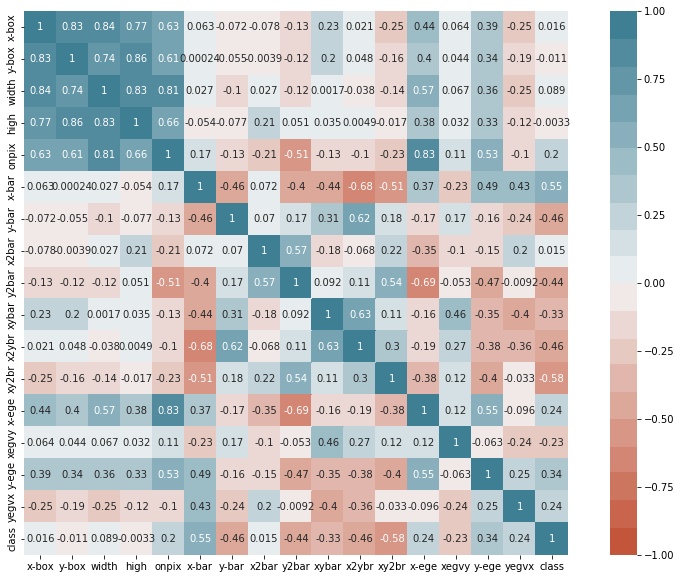

In [28]:
## Generating headmap for determining correlation
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_result.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=20),
    square=True)
plt.show()

In [29]:
## These columns will be used for logistic regression
x_col = df_result.columns[:-1]
y_col = df_result.columns[-1]
X = df_result[x_col]
Y = df_result[y_col]
Y = np.squeeze(Y)

In [30]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1207, 16) (302, 16) (1207,) (302,)


## 2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. 
## Plot the accuracy on test set against the number of weak learners. Use decision tree classifier as the base classifier.

In [33]:
weak_learner = range(1,17)

In [41]:
## importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
## importing accuracy functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [77]:
## Defining function
def train_weak_learners(dt_max_depth,X_train, X_test, y_train, y_test):
    weak_learner = range(1,17)
    test_accuracy=[]
    train_accuracy=[]
    for n_est in weak_learner:
        
        ## Defining Decision Tree Classifier
        dt = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=dt_max_depth)
        # Create adaboost classifer object
        abc =AdaBoostClassifier(n_estimators=n_est, base_estimator=dt,learning_rate=0.1)
        
        model = abc.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        test_acc = round(accuracy_score(y_test, y_pred),3)
        
        test_accuracy.append(test_acc)
        
        train_acc = round(accuracy_score(model.predict(X_train), y_train),3)
        
        train_accuracy.append(test_acc)
        
        
        print(f"for n_estimator = {n_est}, Train Accuracy = {train_acc}, Test Accuracy = {test_acc}")
        
        del dt
        del abc
        del model
        del y_pred
    
    
    return test_accuracy,train_accuracy
    

In [78]:
test_acc,train_acc = train_weak_learners(1,X_train, X_test, y_train, y_test)

for n_estimator = 1, Train Accuracy = 0.78, Test Accuracy = 0.791
for n_estimator = 2, Train Accuracy = 0.78, Test Accuracy = 0.791
for n_estimator = 3, Train Accuracy = 0.771, Test Accuracy = 0.791
for n_estimator = 4, Train Accuracy = 0.807, Test Accuracy = 0.825
for n_estimator = 5, Train Accuracy = 0.843, Test Accuracy = 0.844
for n_estimator = 6, Train Accuracy = 0.817, Test Accuracy = 0.825
for n_estimator = 7, Train Accuracy = 0.843, Test Accuracy = 0.844
for n_estimator = 8, Train Accuracy = 0.817, Test Accuracy = 0.825
for n_estimator = 9, Train Accuracy = 0.845, Test Accuracy = 0.841
for n_estimator = 10, Train Accuracy = 0.841, Test Accuracy = 0.838
for n_estimator = 11, Train Accuracy = 0.824, Test Accuracy = 0.834
for n_estimator = 12, Train Accuracy = 0.843, Test Accuracy = 0.844
for n_estimator = 13, Train Accuracy = 0.843, Test Accuracy = 0.844
for n_estimator = 14, Train Accuracy = 0.836, Test Accuracy = 0.841
for n_estimator = 15, Train Accuracy = 0.843, Test Accuracy

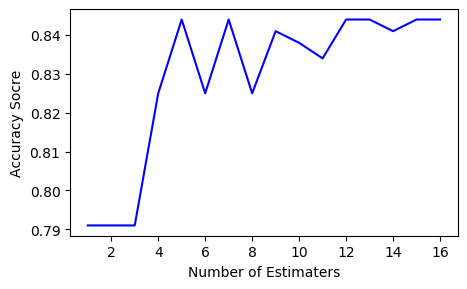

In [79]:
plt.figure(figsize = (5, 3), dpi=100)
plt.plot(weak_learner,test_acc,"-",color='b')
plt.xlabel("Number of Estimaters")
plt.ylabel("Accuracy Socre")
plt.show()

## 3.Repeat step2 with max_depth set as 2.

In [80]:
test_acc,train_acc = train_weak_learners(2,X_train, X_test, y_train, y_test)

for n_estimator = 1, Train Accuracy = 0.861, Test Accuracy = 0.854
for n_estimator = 2, Train Accuracy = 0.857, Test Accuracy = 0.854
for n_estimator = 3, Train Accuracy = 0.857, Test Accuracy = 0.854
for n_estimator = 4, Train Accuracy = 0.878, Test Accuracy = 0.877
for n_estimator = 5, Train Accuracy = 0.894, Test Accuracy = 0.884
for n_estimator = 6, Train Accuracy = 0.889, Test Accuracy = 0.891
for n_estimator = 7, Train Accuracy = 0.878, Test Accuracy = 0.887
for n_estimator = 8, Train Accuracy = 0.877, Test Accuracy = 0.884
for n_estimator = 9, Train Accuracy = 0.885, Test Accuracy = 0.891
for n_estimator = 10, Train Accuracy = 0.895, Test Accuracy = 0.894
for n_estimator = 11, Train Accuracy = 0.898, Test Accuracy = 0.904
for n_estimator = 12, Train Accuracy = 0.911, Test Accuracy = 0.907
for n_estimator = 13, Train Accuracy = 0.909, Test Accuracy = 0.924
for n_estimator = 14, Train Accuracy = 0.915, Test Accuracy = 0.927
for n_estimator = 15, Train Accuracy = 0.913, Test Accura

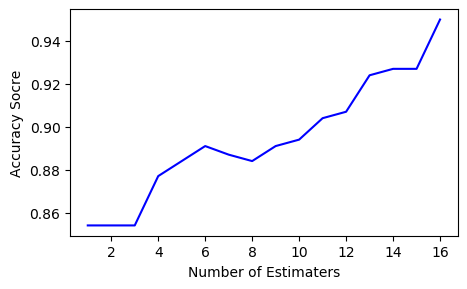

In [81]:
plt.figure(figsize = (5, 3), dpi=100)
plt.plot(weak_learner,test_acc,"-",color='b')
plt.xlabel("Number of Estimaters")
plt.ylabel("Accuracy Socre")
plt.show()